# GUROBI

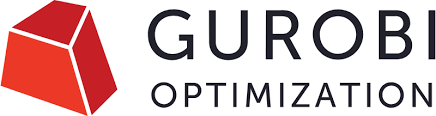

[![Launch on Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/boiro9/jupyterbook2_example/HEAD?labpath=04-Gurobi.ipynb)[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/boiro9/jupyterbook2_example/blob/HEAD/04-Gurobi.ipynb)

```{admonition} 🌐 Web y Documentación
:class: tip

- Web referencia: https://www.gurobi.com/ 
- Documentación: https://www.gurobi.com/documentation/  
```

## Conectando Gurobi con Python

* Para utilizar Gurobi dentro de Python es necesario instalar el modulo **gurobipy** (incluido en la instalación de Gurobi).
* La forma más sencilla es instalarlo usando pip (o otro distribuidor de paquetes de Python):
  ```cmd
    pip install gurobipy 
  ```
* En este [enlace](https://support.gurobi.com/hc/en-us/articles/14799677517585-Getting-Started-with-Gurobi-Optimizer) aparecen los pasos detallados a seguir para empezar a usar Gurobi.

## Conceptos básicos de Gurobi

![title](img/objetos_gurobi.png)

* **Parámetros**: son los que configuran los algoritmos de resolución implementados en Gurobi (por ejemplo, número de iteraciones, tiempo máximo de resolución, ...). Pueden ser modificados antes de que la optimización comience.  
* **Atributos**: son el mecanismo principal para poder extraer o modificar las propiedades el objeto Modelo creado con Gurobi. Los atributos pueden estar asociados a:
    * El **modelo** visto como un conjunto (p.e., valor de la **función objetivo**, extraer la solución, ...)
    * **Variables** (p.e., cotas inferiores y superiores)
    * **Restriccciones** (p.e., lados derechos)
    * SOSs (p.e. componente IIS)
* Environment: son los contenedores donde se almacenan los modelos y la configuración de los parámetros. La API de Python proporciona de forma automática un environment por defecto.

Por razones de rendimiento, se sugiere que a la hora de crear el modelo en Gurobi se siga la siguiente estructura:  
    ![title](img/pasos_gurobi.png)

# Resolviendo mi primer problema sencillo con Gurobi

Un deportistas se encuentra preparando una maratón, para lo cual dispone de un preparador físico que le ha planificado 3 posibles ejercicios físicos de trabajo.
* El deportista debe decidir qué ejercicios llevar a cabo, maximizando el rendimiento físico que le aportan. La actividad 1 y 2 le aportan un 1% de mejora, y la actividad 3 un 2%.
* El deportista dispone de 4 horas para llevar a cabo el entrenamiento:
    * La actividad 1 requiere 1 hora.
    * La actividad 2 requiere 2 horas.
    * La actividad 3 requiere 3 horas.
* El preparador físico le ha obligado a que realice la actividad 1 o 2 (o ambas).

\begin{align*}
\textrm{Maximizar}\ \ \     &  x+y+2z\\
\textrm{sujeto a}\ \ \      & x+2y+3z\leq 4\\
                            & x+y\geq 1\\
                 \ \ \      & x,y,z\in \{0,1\}\\                     
\end{align*}

### Paso 1: Importar las funciones del modulo de gurobipy

In [1]:
import gurobipy as gp
from gurobipy import GRB

### Paso 2: Crear un modelo vacío

In [2]:
m = gp.Model("simplemodel")

Set parameter Username
Set parameter LicenseID to value 2666074
Academic license - for non-commercial use only - expires 2026-05-14


### Paso 3: Crear las variables que denotan si realiza o no cada actividad

In [3]:
x = m.addVar(vtype=GRB.BINARY, name="x")
y = m.addVar(vtype=GRB.BINARY, name="y")
z = m.addVar(vtype=GRB.BINARY, name="z")

### Paso 4: Definir la función objetivo

In [4]:
m.setObjective(x + y + 2*z, GRB.MAXIMIZE)

### Paso 5: Añadir las restricciones al modelo

In [5]:
c1 = m.addConstr(x + 2*y + 3*z <= 4)
c2 = m.addConstr(x + y >= 1)

In [6]:
m.update()
m

<gurobi.Model MIP instance simplemodel: 2 constrs, 3 vars, Parameter changes: Username=(user-defined), LicenseID=2666074>

In [7]:
c1

<gurobi.Constr R0>

### Paso 6: Resolver el problema de optimización

In [8]:
m.optimize()

Gurobi Optimizer version 12.0.3 build v12.0.3rc0 (win64 - Windows 11+.0 (26200.2))

CPU model: 11th Gen Intel(R) Core(TM) i7-1165G7 @ 2.80GHz, instruction set [SSE2|AVX|AVX2|AVX512]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 2 rows, 3 columns and 5 nonzeros
Model fingerprint: 0x98886187
Variable types: 0 continuous, 3 integer (3 binary)
Coefficient statistics:
  Matrix range     [1e+00, 3e+00]
  Objective range  [1e+00, 2e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 4e+00]
Found heuristic solution: objective 2.0000000
Presolve removed 2 rows and 3 columns
Presolve time: 0.00s
Presolve: All rows and columns removed

Explored 0 nodes (0 simplex iterations) in 0.01 seconds (0.00 work units)
Thread count was 1 (of 8 available processors)

Solution count 2: 3 2 

Optimal solution found (tolerance 1.00e-04)
Best objective 3.000000000000e+00, best bound 3.000000000000e+00, gap 0.0000%


### Paso 7: Imprimir la solución

In [9]:
m.printAttr('X')


    Variable            X 
-------------------------
           x            1 
           z            1 


In [10]:
x.getAttr('x'), y.getAttr('x'), z.getAttr('x')

(1.0, 0.0, 1.0)

In [11]:
x.x,y.x,z.x

(1.0, 0.0, 1.0)

In [12]:
m.getVars()

[<gurobi.Var x (value 1.0)>,
 <gurobi.Var y (value 0.0)>,
 <gurobi.Var z (value 1.0)>]

In [13]:
for v in m.getVars():
    print(v.varName, v.x)
print('Obj: ', m.objVal)

x 1.0
y 0.0
z 1.0
Obj:  3.0


# Cómo obtener ayuda

* Usar la función **help()** sin comandos para obtener la ayuda general de los objetos de gurobi
    * help(Model)
    * help(Var)
    * help(Constr)
    * help(GRB.attr)

In [14]:
help(gp.Var)

Help on class Var in module gurobipy._core:

class Var(builtins.object)
 |  Var(cmodel, colno)
 |
 |  Gurobi variable object.  Variables have a number of attributes.
 |  Some can be set (e.g., v.ub = 0.0), while others can only be queried
 |  (e.g., print(v.x)). The most commonly used variable attributes are:
 |    obj: Linear objective coefficient.
 |    lb: Lower bound.
 |    ub: Upper bound.
 |    varName: Variable name.
 |    vType: Variable type ('C', 'B', 'I', 'S', or 'N').
 |    x: Solution value.
 |    rc: Solution reduced cost.
 |    xn: Solution value in an alternate MIP solution.
 |
 |  Type "help(GRB.attr)" for a list of all available attributes.
 |
 |  Note that attribute modifications are handled in a lazy fashion.  You
 |  won't see the effect of a change until after the next call to Model.update()
 |  or Model.optimize().
 |
 |  Methods defined here:
 |
 |  __add__(self, expr)
 |
 |  __cindex__(self)
 |
 |  __dir__(self)
 |
 |  __eq__(self, rhs)
 |
 |  __ge__(self, rhs)

# Formulación matricial del problema

Vamos a resolver el mismo problema de antes pero utilizando la API matricial que proporciona gurobi. Notemos que el problema anterior se puede formular matricialmente como:
\begin{align*}
\textrm{Maximizar}\ \ \     & \pmb{c}^{t} \pmb{x}\\
\textrm{sujeto a}\ \ \      & \mathcal{A}\pmb{x}\leq \pmb{b}\\
                 \ \ \      & \pmb{x}=(x,y,z)\in \{0,1\}^{3}\\                     
\end{align*}
siendo:
* $\pmb{c}=(1,1,2)$.
* $A = \begin{bmatrix} 
1  & 2 & 3 \\ 
-1  & -1 & 0 \\ 
\end{bmatrix}
$
* $b = \begin{bmatrix} 
4   \\ 
-1  \\ 
\end{bmatrix}
$

```{hint}
* La principal **ventaja** de utilizar la **formulación matricial**, es que se basa en numpy arrays, estructuras muy eficientes a la hora de tener que recorrerlos.
* Esto implica que la formulación de este modo será más **rápida computacionalmente**.
```


### Importamos los módulo necesarios

In [15]:
import numpy as np
import scipy.sparse as sp
import gurobipy as gp
from gurobipy import GRB

### Creamos el modelo

In [16]:
m = gp.Model("matrixmodel")

### Creamos las variables

In [17]:
x = m.addMVar(shape=3, vtype=GRB.BINARY, name="x")

### Definimos la función objetivo

In [18]:
obj = np.array([1.0, 1.0, 2.0])
m.setObjective(obj @ x, GRB.MAXIMIZE)

### Restricciones

In [19]:
# Matriz de restricciones (sparse)
data = np.array([1.0, 2.0, 3.0, -1.0, -1.0])
row = np.array([0, 0, 0, 1, 1])
col = np.array([0, 1, 2, 0, 1])

A = sp.csr_matrix((data, (row, col)), shape=(2, 3))

# Lados derechos
rhs = np.array([4.0, -1.0])

# Añadimos las restricciones al modelo
m.addConstr(A @ x <= rhs, name="c")

<MConstr (2,) *awaiting model update*>

### Optimizamos el  modelo

In [20]:
m.optimize()

Gurobi Optimizer version 12.0.3 build v12.0.3rc0 (win64 - Windows 11+.0 (26200.2))

CPU model: 11th Gen Intel(R) Core(TM) i7-1165G7 @ 2.80GHz, instruction set [SSE2|AVX|AVX2|AVX512]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 2 rows, 3 columns and 5 nonzeros
Model fingerprint: 0x8d4960d3
Variable types: 0 continuous, 3 integer (3 binary)
Coefficient statistics:
  Matrix range     [1e+00, 3e+00]
  Objective range  [1e+00, 2e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 4e+00]
Found heuristic solution: objective 2.0000000
Presolve removed 2 rows and 3 columns
Presolve time: 0.00s
Presolve: All rows and columns removed

Explored 0 nodes (0 simplex iterations) in 0.01 seconds (0.00 work units)
Thread count was 1 (of 8 available processors)

Solution count 2: 3 2 

Optimal solution found (tolerance 1.00e-04)
Best objective 3.000000000000e+00, best bound 3.000000000000e+00, gap 0.0000%


### Extraemos la solución

In [21]:
print(x.X)
print('Obj: %g' % m.objVal)

[1. 0. 1.]
Obj: 3


# Formulación de un ejemplo más complejo (empleando diccionarios)

A continuación ilustramos una serie de funciones de Gurobi útiles para manipular de forma más eficiente los datos de entrada necesarios para formular los problemas

## Funciones útiles de gurobi para una formulación más eficiente

### Multidict

In [22]:
names, lower, upper = gp.multidict({ 'x': [0, 1], 'y': [1, 2], 'z': [0, 3] })
print(names)
print(lower)
print(upper)

['x', 'y', 'z']
{'x': 0, 'y': 1, 'z': 0}
{'x': 1, 'y': 2, 'z': 3}


### Clase Tuplelist

In [23]:
l = gp.tuplelist([(1, 2), (1, 3), (2, 3), (2, 4)])
l

<gurobi.tuplelist (4 tuples, 2 values each):
 ( 1 , 2 )
 ( 1 , 3 )
 ( 2 , 3 )
 ( 2 , 4 )
>

In [24]:
print(l.select(1, '*'))

<gurobi.tuplelist (2 tuples, 2 values each):
 ( 1 , 2 )
 ( 1 , 3 )
>


In [25]:
print(l.select('*',3))

<gurobi.tuplelist (2 tuples, 2 values each):
 ( 1 , 3 )
 ( 2 , 3 )
>


In [26]:
print(l.select('*', [2, 4]))

<gurobi.tuplelist (2 tuples, 2 values each):
 ( 1 , 2 )
 ( 2 , 4 )
>


In [27]:
# Se pueden obtener resultados similares empleando list comprehension
print([(x,y) for x,y in l if y in [2,4]])

[(1, 2), (2, 4)]


In [28]:
# Es una subclase de list, o sea que admite las mismas operaciones
l += [(3, 4)]
print(l)

<gurobi.tuplelist (5 tuples, 2 values each):
 ( 1 , 2 )
 ( 1 , 3 )
 ( 2 , 3 )
 ( 2 , 4 )
 ( 3 , 4 )
>


### La clase tupledict:

In [29]:
l = list([(1, 2), (1, 3), (2, 3), (2, 4)])
m = gp.Model('prueba')
d = m.addVars(l, name="d")
d

{(1, 2): <gurobi.Var *Awaiting Model Update*>,
 (1, 3): <gurobi.Var *Awaiting Model Update*>,
 (2, 3): <gurobi.Var *Awaiting Model Update*>,
 (2, 4): <gurobi.Var *Awaiting Model Update*>}

In [30]:
d[(2,3)]

<gurobi.Var *Awaiting Model Update*>

In [31]:
# Contrucción de expresiones lineales
eje1 = sum(d.select(1, '*'))
m.update()
eje1

<gurobi.LinExpr: d[1,2] + d[1,3]>

In [32]:
# Algo más eficiente: método sum de la clase tupledict
eje2 = d.sum(1,'*')
m.update()
eje2

<gurobi.LinExpr: d[1,2] + d[1,3]>

In [33]:
# Método prod de la clase tupledict
coef = {
    (1, 2): 10,
    (1, 3):5,
    (2, 3):1,
    (2, 4):3
}
eje3 = d.prod(coef)
m.update()
eje3

<gurobi.LinExpr: 10.0 d[1,2] + 5.0 d[1,3] + d[2,3] + 3.0 d[2,4]>

In [34]:
# También se puede filtrar:
eje4 = d.prod(coef, 2, '*')
m.update()
eje4

<gurobi.LinExpr: d[2,3] + 3.0 d[2,4]>

In [35]:
# Como tupledict es una subclase de dict, admite todos sus métodos
print(d[1,3])
d[3,4]=0.3
print(d)
print(d.values())

<gurobi.Var d[1,3]>
{(1, 2): <gurobi.Var d[1,2]>, (1, 3): <gurobi.Var d[1,3]>, (2, 3): <gurobi.Var d[2,3]>, (2, 4): <gurobi.Var d[2,4]>, (3, 4): 0.3}
dict_values([<gurobi.Var d[1,2]>, <gurobi.Var d[1,3]>, <gurobi.Var d[2,3]>, <gurobi.Var d[2,4]>, 0.3])


## Multicommodity flow problem

En este ejemplo resolveremos un **multi-commodity flow model** sobre una red pequeña. Sea $G=(N,A)$ un grafo dirigido, y sea $K$ un conjunto de productos. Para cada arco $(i,j)\in A$ y cada producto $k$, existe un coste asociado por unidad de flujo, denotado por $c_{ij}^{k}$. La demanda (o suministro) de cada nodo $i\in N$ para el producto $k$, se denota por $b_{i}^{k}$, donde $b_{i}^{k}\geq 0$ denota un nodo de suministro y $b_{i}^{k}< 0$ un nodo de demanda. La variables de decisión son:
 * $x_{ij}^{k}$ que denota la cantidad de producto $k$ enviado desde el nodo $i$ al nodo $j$. 
El flujo total que viaja a través de un arco $(i,j)\in A$, teniendo en cuenta todos los productos, está acotado superiormente por $u_{ij}$. 

El problema puede modelarse como un problema de programación lineal:
\begin{align*}
\textrm{Minimizar}\ \ \     & \sum_{k\in K}\sum_{(i,j)\in A}c_{ij}^{k}x_{ij}^{k}\\
\textrm{sujeto a}\ \ \      & \sum_{k\in K}x_{ij}^{k}\leq u_{ij}^{k},\ \forall (i,j)\in A \, \text{(Capacidad)}\\
                            & \sum_{(i,j)\in A}x_{ij}^{k}-\sum_{(j,i)\in A}x_{ji}^{k}=b_{i}^{k},\ \forall i\in N, \forall k\in K \, \text{(Conservación de flujo)}\\
                            & x_{ij}^{k}\geq 0,\ \forall (i,j)\in A, \forall k\in K.
\end{align*}

El ejemplo que usaremos tiene las siguientes características:
 * Dos productos (bolígrafos y lápices) son producidos en dos ciudades (Detroit y Denver).
 * Los productos deben ser transportados a almacenes de tres ciudades (Boston, New York y Seattle) para satisfacer una cierta demanda ('inflow[k,i]').
 * Cada arco en la red de transporte tiene un coste asociado (depende del producto) y una capacidad total que se debe respetar ('capacity[i,j]').
 * Se quiere minimizar los costes de transporte ('cost[i,j]').

### Datos

In [36]:
# Base data
commodities = ['Pencils', 'Pens']
nodes = ['Detroit', 'Denver', 'Boston', 'New York', 'Seattle']

arcs, capacity = gp.multidict({
    ('Detroit', 'Boston'):   100,
    ('Detroit', 'New York'):  80,
    ('Detroit', 'Seattle'):  120,
    ('Denver',  'Boston'):   120,
    ('Denver',  'New York'): 120,
    ('Denver',  'Seattle'):  120})

# Cost for triplets commodity-source-destination
cost = {
    ('Pencils', 'Detroit', 'Boston'):   10,
    ('Pencils', 'Detroit', 'New York'): 20,
    ('Pencils', 'Detroit', 'Seattle'):  60,
    ('Pencils', 'Denver',  'Boston'):   40,
    ('Pencils', 'Denver',  'New York'): 40,
    ('Pencils', 'Denver',  'Seattle'):  30,
    ('Pens',    'Detroit', 'Boston'):   20,
    ('Pens',    'Detroit', 'New York'): 20,
    ('Pens',    'Detroit', 'Seattle'):  80,
    ('Pens',    'Denver',  'Boston'):   60,
    ('Pens',    'Denver',  'New York'): 70,
    ('Pens',    'Denver',  'Seattle'):  30}

# Demand for pairs of commodity-city
inflow = {
    ('Pencils', 'Detroit'):   50,
    ('Pencils', 'Denver'):    60,
    ('Pencils', 'Boston'):   -50,
    ('Pencils', 'New York'): -50,
    ('Pencils', 'Seattle'):  -10,
    ('Pens',    'Detroit'):   60,
    ('Pens',    'Denver'):    40,
    ('Pens',    'Boston'):   -40,
    ('Pens',    'New York'): -30,
    ('Pens',    'Seattle'):  -30}

### Formulación del modelo en gurobipy

In [37]:
# Creamos el modelo
mnet = gp.Model('netflow')

# Definimos las variables y función objetivo:
flow = mnet.addVars(commodities, arcs, obj=cost, name="flow")

###
# Restriccionees
###

## Restricción de capacidad en los arcos
mnet.addConstrs(
    (flow.sum('*', i, j) <= capacity[i, j] for i, j in arcs), "cap")

# Otra forma utilizando loops de Python:
# for i, j in arcs:
#   mnet.addConstr(sum(flow[h, i, j] for h in commodities) <= capacity[i, j],
#               "cap[%s, %s]" % (i, j))

## Restricción de conservación de flujo
mnet.addConstrs(
    (flow.sum(k, i, '*')-flow.sum(k, '*',i) == inflow[k, i]
        for k in commodities for i in nodes), "node")

# Versión alternativa utilizando quicksum de gurobi
# mnet.addConstrs(
#   (gp.quicksum(flow[h, i, j] for i, j in arcs.select('*', j)) + inflow[h, j] ==
#     gp.quicksum(flow[h, j, k] for j, k in arcs.select(j, '*'))
#     for h in commodities for j in nodes), "node")

# Resolvemos el modelo:
mnet.optimize()


Gurobi Optimizer version 12.0.3 build v12.0.3rc0 (win64 - Windows 11+.0 (26200.2))

CPU model: 11th Gen Intel(R) Core(TM) i7-1165G7 @ 2.80GHz, instruction set [SSE2|AVX|AVX2|AVX512]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 16 rows, 12 columns and 36 nonzeros
Model fingerprint: 0x06ffdf1e
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e+01, 8e+01]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+01, 1e+02]
Presolve removed 16 rows and 12 columns
Presolve time: 0.01s
Presolve: All rows and columns removed
Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    5.5000000e+03   0.000000e+00   2.000000e+01      0s
Extra simplex iterations after uncrush: 1
       1    5.5000000e+03   0.000000e+00   0.000000e+00      0s

Solved in 1 iterations and 0.01 seconds (0.00 work units)
Optimal objective  5.500000000e+03


### Reportamos la solución

In [38]:
print('Objective function: %g' % mnet.objVal)
if mnet.status == GRB.OPTIMAL:
    solution = mnet.getAttr('x', flow)
    for k in commodities:
        print('\nOptimal flows for %s:' % k)
        for i, j in arcs:
            if solution[k, i, j] > 0:
                print('%s -> %s: %g' % (i, j, solution[k, i, j]))

Objective function: 5500

Optimal flows for Pencils:
Detroit -> Boston: 50
Denver -> New York: 50
Denver -> Seattle: 10

Optimal flows for Pens:
Detroit -> Boston: 30
Detroit -> New York: 30
Denver -> Boston: 10
Denver -> Seattle: 30


In [39]:
mnet.write('gurobi_model.mps')

# Separación de modelo-datos en Python

Cuando se contruye un modelo de optimización en un lenguaje de modelado, es muy frecuente separar la **formulación** del problema de optimización en sí mismo de los **datos** que se utilizan para crear un **instancia concreta** del modelo.

## Datos

In [40]:
def data_instance1():
    # Función objetivo
    obj = np.array([1.0, 1.0, 2.0])

    # Matriz de restricciones
    data = np.array([1.0, 2.0, 3.0, -1.0, -1.0])
    row = np.array([0, 0, 0, 1, 1])
    col = np.array([0, 1, 2, 0, 1])

    A = sp.csr_matrix((data, (row, col)), shape=(2, 3))

    # Lados derechos
    rhs = np.array([4.0, -1.0])
    
    return obj, A, rhs

In [41]:
def data_instance2():
    # Función objetivo
    obj = np.array([2.0, 2.0, 1.0])

    # Matriz de restricciones
    data = np.array([1.0, 2.0, 3.0, -1.0, -1.0])
    row = np.array([0, 0, 0, 1, 1])
    col = np.array([0, 1, 2, 0, 1])

    A = sp.csr_matrix((data, (row, col)), shape=(2, 3))

    # Lados derechos
    rhs = np.array([4.0, -1.0])
    
    return obj, A, rhs

## Función para resolver el problema

In [42]:
def solve_matrix_problem(obj,A,rhs):
    # Creamos el modelo
    m = gp.Model("matrixmodel")

    # Creamos las variables
    x = m.addMVar(shape=obj.size, vtype=GRB.BINARY, name="x")

    # Definimos la función objetivo
    m.setObjective(obj @ x, GRB.MAXIMIZE)

    #Añadimos las restricciones
    m.addConstr(A @ x <= rhs, name="c")

    ### Optimizamos el  modelo
    m.optimize()

    ### Extraemos la solución
    print(x.X)
    print('Obj: %g' % m.objVal)
    
    return m

## Resolvemos

In [43]:
# Datos de la instancia
obj,A,rhs = data_instance1()
# Resolvemos el problema para una instancia concreta
m = solve_matrix_problem(obj,A,rhs)

Gurobi Optimizer version 12.0.3 build v12.0.3rc0 (win64 - Windows 11+.0 (26200.2))

CPU model: 11th Gen Intel(R) Core(TM) i7-1165G7 @ 2.80GHz, instruction set [SSE2|AVX|AVX2|AVX512]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 2 rows, 3 columns and 5 nonzeros
Model fingerprint: 0x8d4960d3
Variable types: 0 continuous, 3 integer (3 binary)
Coefficient statistics:
  Matrix range     [1e+00, 3e+00]
  Objective range  [1e+00, 2e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 4e+00]
Found heuristic solution: objective 2.0000000
Presolve removed 2 rows and 3 columns
Presolve time: 0.00s
Presolve: All rows and columns removed

Explored 0 nodes (0 simplex iterations) in 0.01 seconds (0.00 work units)
Thread count was 1 (of 8 available processors)

Solution count 2: 3 2 

Optimal solution found (tolerance 1.00e-04)
Best objective 3.000000000000e+00, best bound 3.000000000000e+00, gap 0.0000%
[1. 0. 1.]
Obj: 3


In [44]:
obj,A,rhs = data_instance2()
m = solve_matrix_problem(obj,A,rhs)

Gurobi Optimizer version 12.0.3 build v12.0.3rc0 (win64 - Windows 11+.0 (26200.2))

CPU model: 11th Gen Intel(R) Core(TM) i7-1165G7 @ 2.80GHz, instruction set [SSE2|AVX|AVX2|AVX512]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 2 rows, 3 columns and 5 nonzeros
Model fingerprint: 0xcf544dfc
Variable types: 0 continuous, 3 integer (3 binary)
Coefficient statistics:
  Matrix range     [1e+00, 3e+00]
  Objective range  [1e+00, 2e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 4e+00]
Found heuristic solution: objective 4.0000000
Presolve removed 2 rows and 3 columns
Presolve time: 0.00s
Presolve: All rows and columns removed

Explored 0 nodes (0 simplex iterations) in 0.01 seconds (0.00 work units)
Thread count was 1 (of 8 available processors)

Solution count 1: 4 

Optimal solution found (tolerance 1.00e-04)
Best objective 4.000000000000e+00, best bound 4.000000000000e+00, gap 0.0000%
[1. 1. 0.]
Obj: 4


# Algunas opciones avanzadas

## Modificaciones del modelo

In [45]:
def print_sol(mnet):
    if mnet.status == GRB.OPTIMAL:
        solution = mnet.getAttr('x', flow)
        for k in commodities:
            print('\nOptimal flows for %s:' % k)
            for i, j in arcs:
                if solution[k, i, j] > 0:
                    print('%s -> %s: %g' % (i, j, solution[k, i, j]))

In [46]:
print_sol(mnet)


Optimal flows for Pencils:
Detroit -> Boston: 50
Denver -> New York: 50
Denver -> Seattle: 10

Optimal flows for Pens:
Detroit -> Boston: 30
Detroit -> New York: 30
Denver -> Boston: 10
Denver -> Seattle: 30


In [47]:
# Forzamos que no haya flujo de 'Pencil' de Detroit a Boston
flow[('Pencils','Detroit','Boston')].ub = 0
mnet.optimize()

Gurobi Optimizer version 12.0.3 build v12.0.3rc0 (win64 - Windows 11+.0 (26200.2))

CPU model: 11th Gen Intel(R) Core(TM) i7-1165G7 @ 2.80GHz, instruction set [SSE2|AVX|AVX2|AVX512]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 16 rows, 12 columns and 36 nonzeros
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e+01, 8e+01]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+01, 1e+02]

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    5.5000000e+03   5.000000e+01   0.000000e+00      0s
       1    6.0000000e+03   0.000000e+00   0.000000e+00      0s

Solved in 1 iterations and 0.01 seconds (0.00 work units)
Optimal objective  6.000000000e+03


In [48]:
print_sol(mnet)


Optimal flows for Pencils:
Detroit -> New York: 50
Denver -> Boston: 50
Denver -> Seattle: 10

Optimal flows for Pens:
Detroit -> Boston: 30
Detroit -> New York: 30
Denver -> Boston: 10
Denver -> Seattle: 30


## Cambio de opciones del solver

In [49]:
# https://docs.gurobi.com/projects/optimizer/en/current/reference/parameters.html#secparameterreference
help(mnet.Params)

Help on ParamClass in module gurobipy._core object:

class ParamClass(builtins.object)
 |  ParamClass(env)
 |
 |  Gurobi parameters are used to control the optimization process.  They all
 |  have default values, but their values can be queried or modified through the
 |  Model.Params class (e.g., 'limit = model.Params.nodeLimit',
 |  'model.Params.MIPGap = 0.0').
 |
 |  Parameters fall into the following categories:
 |
 |  Termination: affect the termination of an optimize() call
 |    BarIterLimit: limits the number of barrier iterations performed
 |    BestBdStop: sets a best bound values at which optimization should stop
 |    BestObjStop: sets an objective value at which optimization should stop
 |    Cutoff: sets a target objective value
 |    IterationLimit: limits the number of simplex iterations performed
 |    MemLimit: returns an error if the total amount of memory used by Gurobi exceeds this limit (in GB)
 |    NodeLimit: limits the number of MIP nodes explored
 |    SoftMe

In [50]:
# Tiempo máximo de resolucióm
mnet.Params.TimeLimit = 5

Set parameter TimeLimit to value 5


In [51]:
# Forzamos a utilizar el Símplex Primal:
# https://docs.gurobi.com/projects/optimizer/en/current/reference/parameters.html#method
mnet.Params.Method = 0

Set parameter Method to value 0


In [52]:
mnet.Params.MIPGap

0.0001

In [53]:
flow[('Pencils','Detroit','Boston')].Start = 10

## Análisis de infactibilidades

In [54]:
# Forzamos que tampoco haya flujo de 'Pencil' de Denver a Boston (demandaba 50)
flow[('Pencils','Denver','Boston')].ub = 0
mnet.optimize()

Gurobi Optimizer version 12.0.3 build v12.0.3rc0 (win64 - Windows 11+.0 (26200.2))

CPU model: 11th Gen Intel(R) Core(TM) i7-1165G7 @ 2.80GHz, instruction set [SSE2|AVX|AVX2|AVX512]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Non-default parameters:
TimeLimit  5
Method  0

Optimize a model with 16 rows, 12 columns and 36 nonzeros
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e+01, 8e+01]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+01, 1e+02]

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    6.0000000e+03   5.000000e+01   0.000000e+00      0s

Solved in 0 iterations and 0.01 seconds (0.00 work units)
Infeasible model


In [55]:
# Compute an Irreducible Inconsistent Subsystem (IIS)
mnet.computeIIS()

Gurobi Optimizer version 12.0.3 build v12.0.3rc0 (win64 - Windows 11+.0 (26200.2))

CPU model: 11th Gen Intel(R) Core(TM) i7-1165G7 @ 2.80GHz, instruction set [SSE2|AVX|AVX2|AVX512]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Non-default parameters:
TimeLimit  5
Method  0


IIS computed: 1 constraints and 2 bounds
IIS runtime: 0.00 seconds (0.00 work units)


In [56]:
mnet.write('modelo_infactible.ilp')

In [57]:
f_nofeas  = open('modelo_infactible.ilp', 'r')
data = f_nofeas.read()
f_nofeas.close()           
print(data)

\ Model netflow_copy
\ LP format - for model browsing. Use MPS format to capture full model detail.
\ Signature: 0x833cd2eb38381dbe
Minimize
 
Subject To
 node[Pencils,Boston]: - flow[Pencils,Detroit,Boston]
   - flow[Pencils,Denver,Boston] = -50
Bounds
 -infinity <= flow[Pencils,Detroit,Boston] <= 0
 -infinity <= flow[Pencils,Denver,Boston] <= 0
End

